<h2 style="font-weight: 700; text-align: center">Depth First Search (DFS) for Graph Node Search</h2>

#### Graph Reference

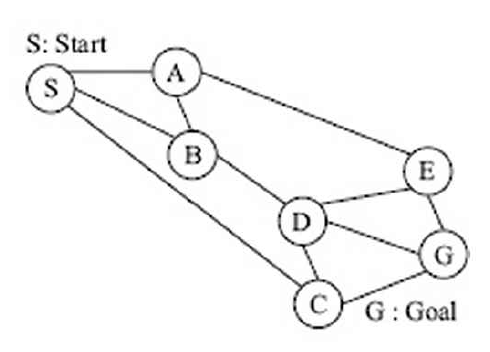

In [89]:
from IPython.display import Image, display
Image(filename="Graph_1_ref.png", width=275, height=200)

#### Graph Representation

In [90]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node and connected children
graph = { "S": ["A", "B", "C"],
          "A": ["B", "E", "S"],
          "B": ["A", "D", "S"],
          "C": ["D", "G", "S"],
          "D": ["B", "C", "E", "G"],
          "E": ["A", "D", "G"],
          "G": ["C", "D", "E"]
        }

##### Making Parent-Child Tuples for OPEN and CLOSED Lists of traversal progression

In [91]:
def make_pair(to_, from_):
  return (to_, from_)

#### The new nodes generating function -> MoveGen

In [92]:
def dfs_move_gen(graph, curr):
  new_nodes = [make_pair(new, curr) for new in graph[curr]]
  return new_nodes

#### Function which avoid repetition and infinite looping -> Remove_Seen

###### Remove_seen checks *both* the *CLOSED* and *OPEN* lists

In [93]:
def dfs_remove_seen(new_, OPEN, CLOSED):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  CLOSED_ = [n[0] for n in CLOSED]
  for node in new_:
    if node[0] not in OPEN_ and node[0] not in CLOSED_:
      cleansed.append(node)
  return cleansed

#### The final path forming function -> Reconstruct Path

In [94]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0]:
        path.append(m)
        node = m
  return path

#### Main - Graph_DFS

In [95]:
def graph_dfs(graph, start, goal):
  OPEN = [make_pair(start, "NIL")]
  CLOSED = []
  
  while len(OPEN) != 0:
    if OPEN[0][0] == goal:
      print(*reconstruct_path(OPEN, CLOSED), sep="\033[38;5;207m -> \033[0m")
      break
    else:
      CLOSED.append(OPEN.pop(0))
      new_nodes = dfs_move_gen(graph, CLOSED[-1][0])
      new_nodes = dfs_remove_seen(new_nodes, OPEN, CLOSED)
      [(OPEN.insert(0, i)) for i in new_nodes]

#### Function Calls

In [96]:
graph_dfs(graph, "S", "G")

('G', 'C') -> ('C', 'S') -> ('S', 'NIL')
